# Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("./dataset/aps_failure_training_set.csv", delimiter=',', on_bad_lines='skip')

In [3]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


# Data Cleaning

In [5]:
data_dublicates=data.duplicated()
data_dublicates

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Length: 60000, dtype: bool

In [6]:
data_dublicates.any()

False

Result: The analysis shows that in this dataset we don't have any duplicates.

In [7]:
data_cleaned = pd.read_csv("./dataset/aps_failure_training_set.csv", delimiter=',', na_values="na")
data_cleaned.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_cleaned.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [10]:
data_cleaned.isnull().sum(axis = 0)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [11]:
data_cleaned.isna().sum(axis = 0).value_counts()

671      40
688      10
669      10
687      10
13808     9
629       6
2723      6
2724      5
2726      5
14861     5
642       5
4008      4
589       4
691       4
2500      4
4007      3
338       3
2727      3
726       2
9553      2
46329     2
0         2
2503      2
645       2
9877      1
3255      1
4006      1
4009      1
2502      1
676       1
48722     1
4356      1
473       1
3257      1
167       1
49264     1
47740     1
46333     1
44009     1
39549     1
27277     1
23034     1
2725      1
2501      1
4400      1
3335      1
10239     1
dtype: int64

In [12]:
data_cleaned.isnull().sum(axis = 0).index

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [13]:
represent_numberNan=pd.DataFrame(data_cleaned.isnull().sum(axis = 0), columns=['Number of NaN'])
represent_numberNan

,Number of NaN
class,0
aa_000,0
ab_000,46329
ac_000,3335
ad_000,14861
...,...
ee_007,671
ee_008,671
ee_009,671
ef_000,2724


In [14]:
number_of_rows=len(data_cleaned.index)

In [15]:
represent_numberNan_percentage=pd.DataFrame(data_cleaned.isnull().sum(axis = 0)*100/number_of_rows, columns=['Number of NaN in percentages'])
represent_numberNan_percentage

,Number of NaN in percentages
class,0.000000
aa_000,0.000000
ab_000,77.215000
ac_000,5.558333
ad_000,24.768333
...,...
ee_007,1.118333
ee_008,1.118333
ee_009,1.118333
ef_000,4.540000


In [16]:
represent_numberNan.sort_values(by=['Number of NaN'], ascending=False).head()

,Number of NaN
br_000,49264
bq_000,48722
bp_000,47740
bo_000,46333
ab_000,46329


In [17]:
represent_numberNan_percentage.sort_values(by=['Number of NaN in percentages'], ascending=False).head()

,Number of NaN in percentages
br_000,82.106667
bq_000,81.203333
bp_000,79.566667
bo_000,77.221667
ab_000,77.215000


In [18]:
represent_numberNan=represent_numberNan.sort_values(by=['Number of NaN'], ascending=False)
represent_numberNan.head()

,Number of NaN
br_000,49264
bq_000,48722
bp_000,47740
bo_000,46333
ab_000,46329


In [19]:
represent_numberNan[represent_numberNan>=20000].dropna().value_counts()

Number of NaN
46329.0          2
23034.0          1
27277.0          1
39549.0          1
44009.0          1
46333.0          1
47740.0          1
48722.0          1
49264.0          1
dtype: int64

In [20]:
represent_numberNan_percentage[represent_numberNan_percentage>=70].dropna().value_counts()

Number of NaN in percentages
77.215000                       2
73.348333                       1
77.221667                       1
79.566667                       1
81.203333                       1
82.106667                       1
dtype: int64

In [21]:
represent_numberNan_percentage[represent_numberNan_percentage>=70].dropna()

,Number of NaN in percentages
ab_000,77.215000
bn_000,73.348333
bo_000,77.221667
bp_000,79.566667
bq_000,81.203333
br_000,82.106667
cr_000,77.215000


In [22]:
represent_numberNan_percentage[represent_numberNan_percentage<=5].dropna()

,Number of NaN in percentages
class,0.000000
aa_000,0.000000
ae_000,4.166667
af_000,4.166667
ag_000,1.118333
...,...
ee_007,1.118333
ee_008,1.118333
ee_009,1.118333
ef_000,4.540000


<AxesSubplot:>

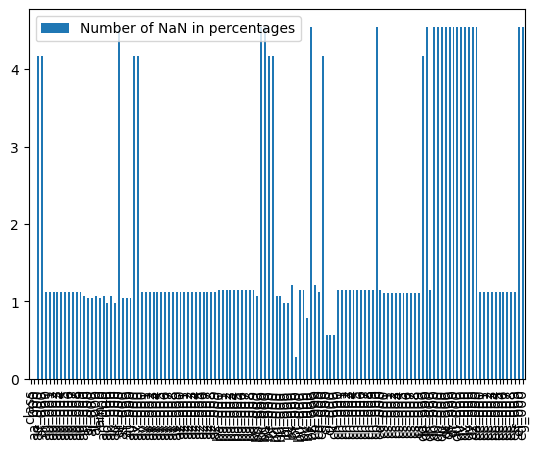

In [23]:
represent_numberNan_percentage[represent_numberNan_percentage<=5].dropna().plot.bar()

(100.5, 125.5)

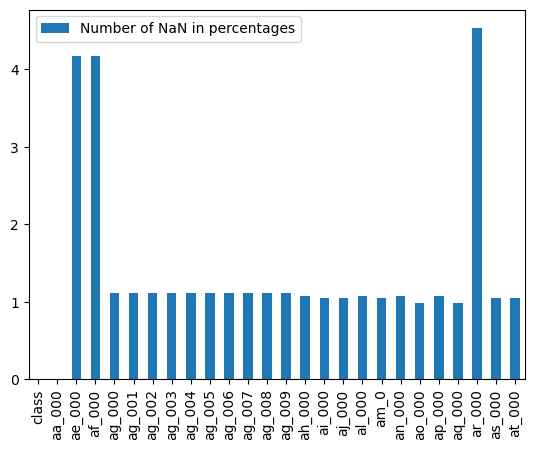

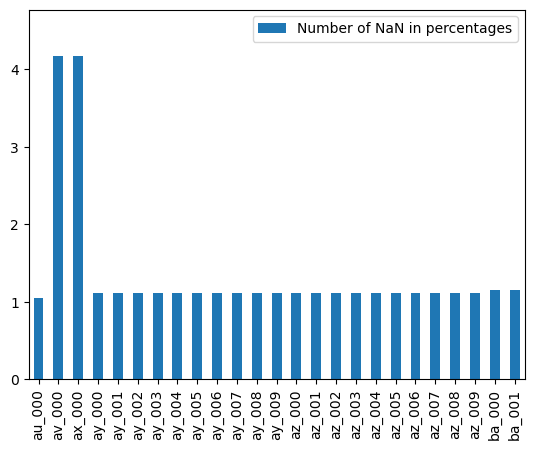

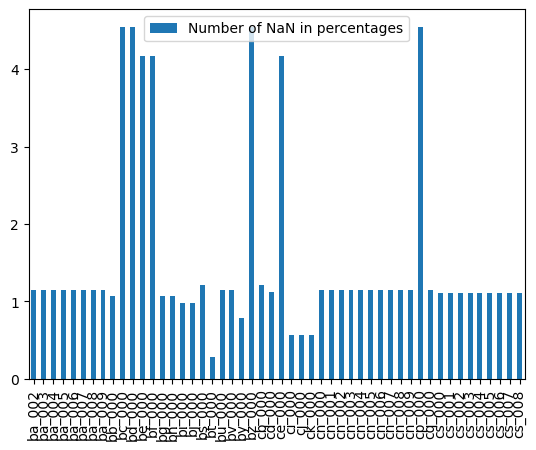

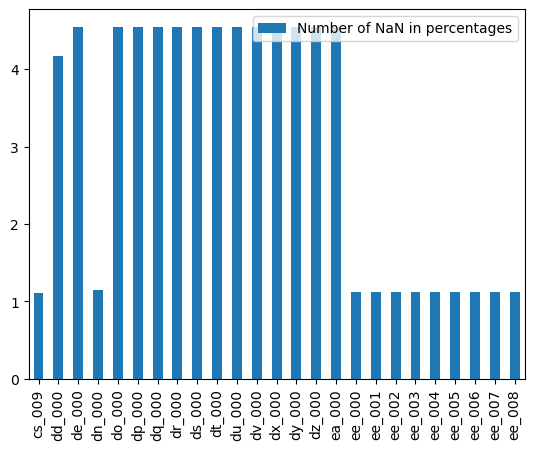

In [24]:
ax = represent_numberNan_percentage[represent_numberNan_percentage<=5].dropna().plot.bar()
ax.set_xlim(-0.5,25.5)
ax1 = represent_numberNan_percentage[represent_numberNan_percentage<=5].dropna().plot.bar()
ax1.set_xlim(25.5,50.5)
ax2 = represent_numberNan_percentage[represent_numberNan_percentage<=5].dropna().plot.bar()
ax2.set_xlim(50.5,100.5)
ax3 = represent_numberNan_percentage[represent_numberNan_percentage<=5].dropna().plot.bar()
ax3.set_xlim(100.5,125.5)

In [25]:
represent_numberNan[(represent_numberNan<=20000) & (represent_numberNan>=10000)].dropna().value_counts()

Number of NaN
13808.0          9
14861.0          5
10239.0          1
dtype: int64

In [26]:
represent_numberNan[(represent_numberNan<=20000) & (represent_numberNan>=10000)].dropna().value_counts().sum(axis=0)

15

In [27]:
represent_numberNan[(represent_numberNan<=10000) & (represent_numberNan>=4000)].dropna().value_counts()

Number of NaN
4008.0           4
4007.0           3
9553.0           2
4006.0           1
4009.0           1
4356.0           1
4400.0           1
9877.0           1
dtype: int64

In [28]:
represent_numberNan[(represent_numberNan<=10000) & (represent_numberNan>=4000)].dropna().value_counts().sum(axis=0)

14

In [29]:
represent_numberNan[(represent_numberNan<=4000) & (represent_numberNan>=2000)].dropna().value_counts()

Number of NaN
2723.0           6
2724.0           5
2726.0           5
2500.0           4
2727.0           3
2503.0           2
2501.0           1
2502.0           1
2725.0           1
3255.0           1
3257.0           1
3335.0           1
dtype: int64

In [30]:
represent_numberNan[(represent_numberNan<=4000) & (represent_numberNan>=2000)].dropna().value_counts().sum(axis=0)

31

In [31]:
represent_numberNan[(represent_numberNan<=2000) & (represent_numberNan>=100)].dropna().value_counts()

Number of NaN
671.0            40
669.0            10
687.0            10
688.0            10
629.0             6
642.0             5
589.0             4
691.0             4
338.0             3
645.0             2
726.0             2
167.0             1
473.0             1
676.0             1
dtype: int64

In [32]:
represent_numberNan[(represent_numberNan<=2000) & (represent_numberNan>=100)].dropna().value_counts().sum(axis=0)

99

In [33]:
represent_numberNan[represent_numberNan<=100].dropna().value_counts()

Number of NaN
0.0              2
dtype: int64

In [34]:
represent_numberNan_percentage[(represent_numberNan_percentage>=5) & (represent_numberNan_percentage<=70)].dropna().value_counts().sum(axis=0)

35

(-0.5, 170.5)

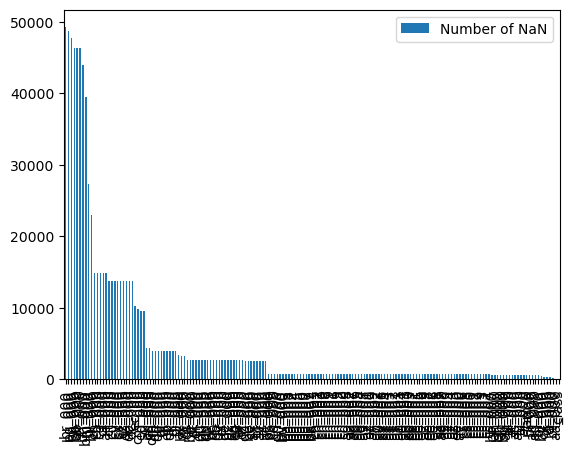

In [35]:
ax = represent_numberNan.plot.bar()
ax.get_xlim()

(151.5, 170.5)

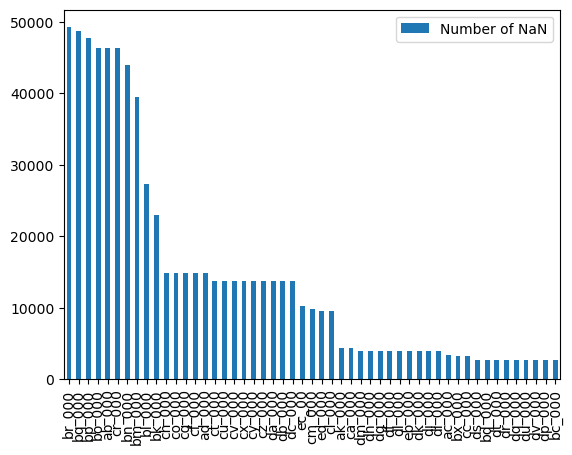

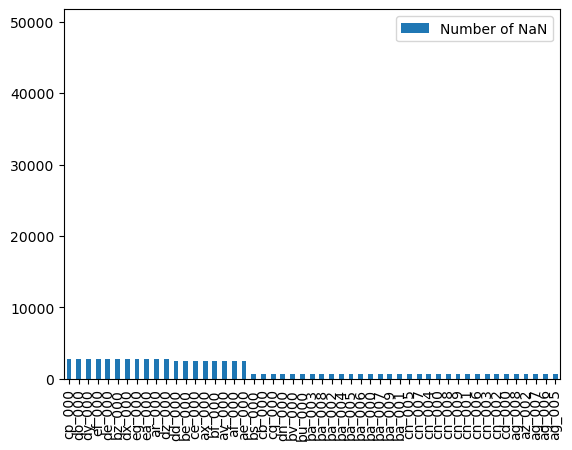

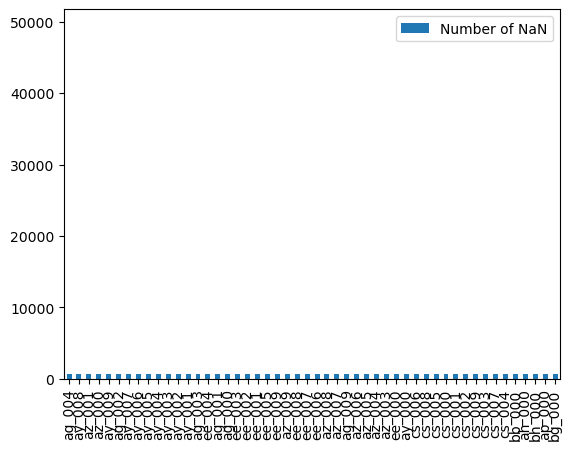

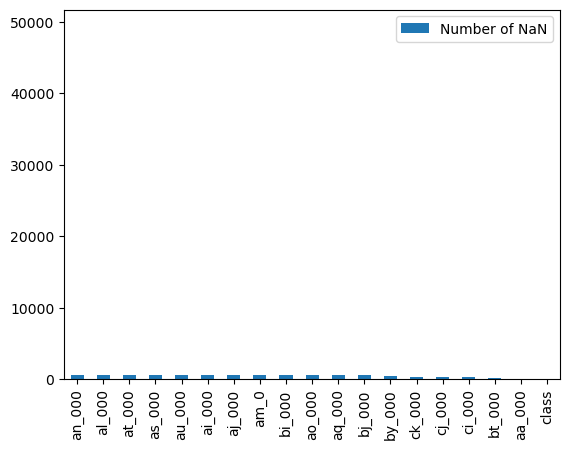

In [36]:
ax = represent_numberNan.plot.bar()
ax.set_xlim(-0.5,50.5)
ax1 = represent_numberNan.plot.bar()
ax1.set_xlim(50.5,101.5)
ax2 = represent_numberNan.plot.bar()
ax2.set_xlim(101.5,151.5)
ax3 = represent_numberNan.plot.bar()
ax3.set_xlim(151.5,170.5)

# More readable representation for report and presentation

(150.5, 171.5)

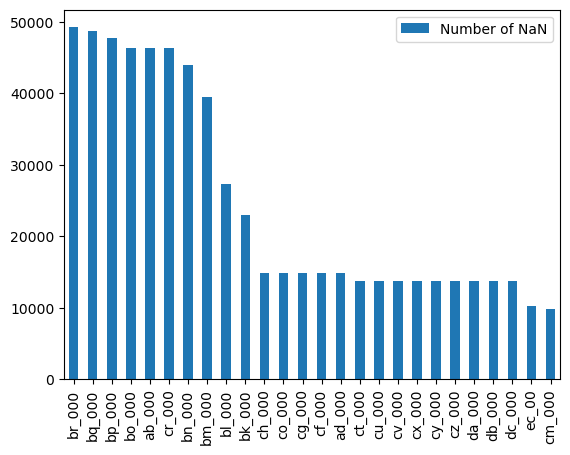

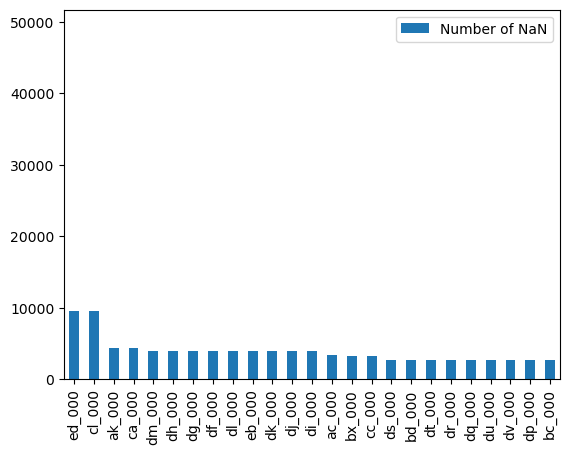

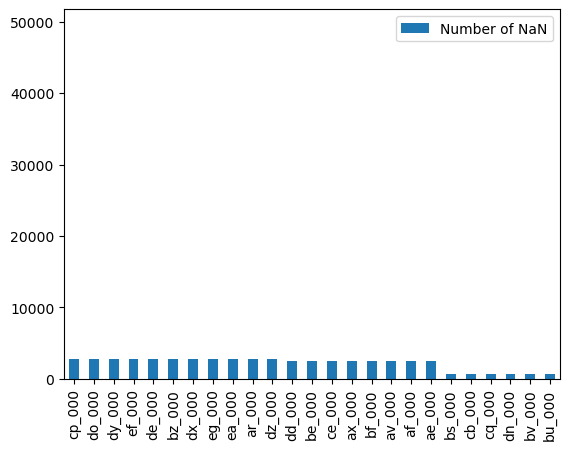

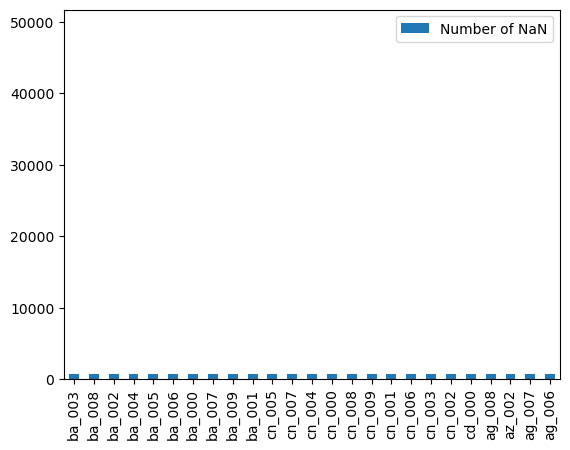

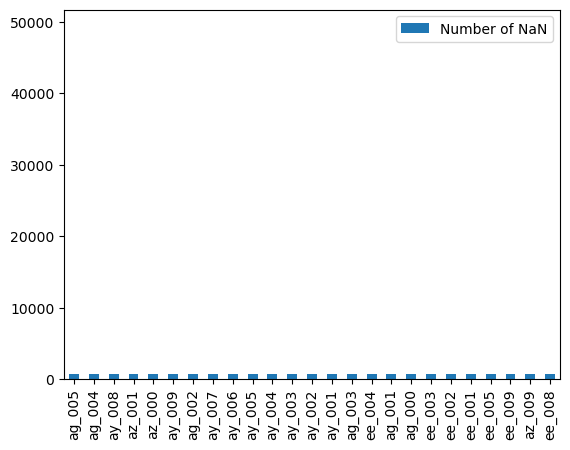

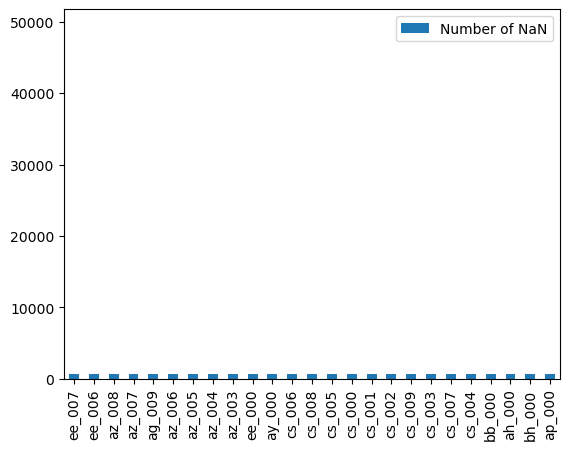

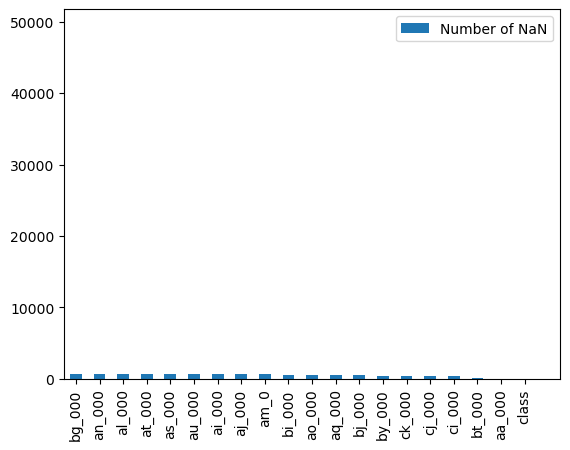

In [37]:
ax = represent_numberNan.plot.bar()
ax.set_xlim(-0.5,25.5)
ax1 = represent_numberNan.plot.bar()
ax1.set_xlim(25.5,50.5)
ax2 = represent_numberNan.plot.bar()
ax2.set_xlim(50.5,75.5)
ax3 = represent_numberNan.plot.bar()
ax3.set_xlim(75.5,100.5)
ax4 = represent_numberNan.plot.bar()
ax4.set_xlim(100.5,125.5)
ax5 = represent_numberNan.plot.bar()
ax5.set_xlim(125.5,150.5)
ax6 = represent_numberNan.plot.bar()
ax6.set_xlim(150.5,171.5)

In [38]:
data_cleaned.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Exploratory analysis

In [39]:
data_cleaned.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


The describe() function is a method used to generate descriptive statistics of a dataset in Pandas, a popular data analysis library in Python. It provides a summary of various statistical measures for each numerical column in the dataset.

In [40]:
data_cleaned['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

The code is used to calculate the frequency count of unique values in the 'class' column of the DataFrame data_cleaned. It returns a Series object that contains the count of occurrences of each unique value in the 'class' column.

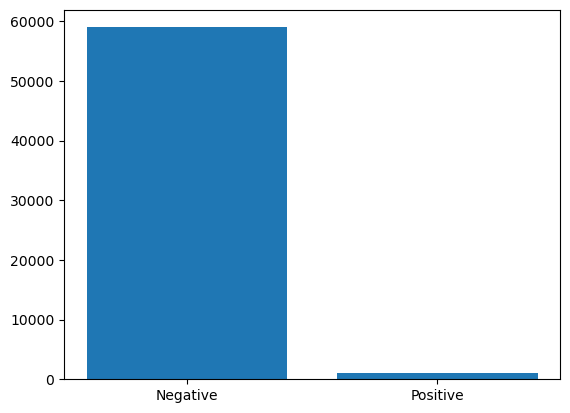

In [41]:
y_pos = np.arange(2) 
plt.bar(y_pos, list(data_cleaned['class'].value_counts()))
plt.xticks(y_pos, ["Negative", "Positive"]) 
plt.show()

The code generates a bar chart that visualizes the frequency counts of the unique values in the 'class' column of the DataFrame. The x-axis represents the labels "Negative" and "Positive", while the height of the bars represents the corresponding counts. This chart provides a visual representation of the class distribution in the dataset.

#### Seperating Attributes and Class Label

In [42]:
x_train = data_cleaned

In [43]:
nan_count = {k:list(x_train.isna().sum()*100/x_train.shape[0])[i] for i,k in enumerate(x_train.columns)}
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}
nan_count

{'br_000': 82.10666666666667,
 'bq_000': 81.20333333333333,
 'bp_000': 79.56666666666666,
 'bo_000': 77.22166666666666,
 'ab_000': 77.215,
 'cr_000': 77.215,
 'bn_000': 73.34833333333333,
 'bm_000': 65.915,
 'bl_000': 45.461666666666666,
 'bk_000': 38.39,
 'ad_000': 24.768333333333334,
 'cf_000': 24.768333333333334,
 'cg_000': 24.768333333333334,
 'ch_000': 24.768333333333334,
 'co_000': 24.768333333333334,
 'ct_000': 23.013333333333332,
 'cu_000': 23.013333333333332,
 'cv_000': 23.013333333333332,
 'cx_000': 23.013333333333332,
 'cy_000': 23.013333333333332,
 'cz_000': 23.013333333333332,
 'da_000': 23.013333333333332,
 'db_000': 23.013333333333332,
 'dc_000': 23.013333333333332,
 'ec_00': 17.065,
 'cm_000': 16.461666666666666,
 'cl_000': 15.921666666666667,
 'ed_000': 15.921666666666667,
 'ak_000': 7.333333333333333,
 'ca_000': 7.26,
 'dm_000': 6.681666666666667,
 'df_000': 6.68,
 'dg_000': 6.68,
 'dh_000': 6.68,
 'dl_000': 6.68,
 'dj_000': 6.678333333333334,
 'dk_000': 6.67833333333

Delete Columns more than 70% of nan

This code provides a convenient way to calculate and display the percentage of missing values for each column in the `x_train` DataFrame, helping to identify columns with a higher proportion of missing data.

Delete Columns more than 70% of nan

In [44]:
x_train = x_train.dropna(axis = 1, thresh=18000)
x_train

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


The code removes columns from the `x_train` DataFrame that have fewer than 18,000(70%) non-null values. This approach is useful when dealing with datasets that have a large number of missing values in certain columns. By removing columns with a substantial amount of missing data, the code aims to improve the quality and usefulness of the remaining data for further analysis or modeling tasks.

Delete Less then 5%

In [45]:
na_5 = [k for k,v in nan_count.items() if v < 5]
x_train = x_train.dropna(subset=na_5)
x_train

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


This code filters the `x_train` DataFrame to keep only the rows that have non-null values in columns with less than 5% missing values. This approach allows for the removal of rows with a relatively small amount of missing data while retaining most of the data for further analysis or modeling purposes.

In [46]:
x_train = x_train.reset_index(drop=True)
x_train

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
55932,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
55933,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
55934,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


By resetting the index with `drop=True`, the resulting `x_train` DataFrame will have a new index starting from 0 and incremented by one for each row. The original index, which might have been modified or fragmented due to previous operations, is discarded.

We can found column with `Standart Diviations` that equls to 0 and remove them becouse they cant improve our model

In [47]:
x_train_std = x_train.std()
columns_with_zero_std = x_train_std[x_train_std == 0].index
x_train = x_train.drop(columns_with_zero_std, axis=1)
x_train

C:\Users\Vlad\AppData\Local\Temp\ipykernel_21028\3982987029.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x_train_std = x_train.std()


,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
55932,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
55933,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
55934,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In summary, this code snippet identifies and removes any columns from the `x_train` dataset that have a standard deviation of zero. These columns have constant values and do not provide any useful information for training a machine learning model. By removing them, the code aims to improve the quality of the data and potentially enhance the performance of the model.

#### Seperating Attributes and Class Label

In [48]:
y_train = x_train['class']
x_train = x_train.drop('class',axis=1)

In [49]:
x_train

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
55932,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
55933,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
55934,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


Change all NAN values to mean of columns

In [50]:
mean_imputed_features = [k for k,v in nan_count.items() if v >= 5 and v < 70]
mean_imputed_features
mean_imputer = SimpleImputer(missing_values=np.NaN , strategy='mean',copy=True)
# Creating a new dataframe of imputed values
mean_df = mean_imputer.fit_transform(x_train[mean_imputed_features])
df1 = x_train.copy()
df1[mean_imputed_features] = mean_df
df1

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,194980.725785,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,153002,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
55932,2286,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
55933,112,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
55934,80292,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


The previous code performs mean imputation on selected features in the `x_train` DataFrame, identified based on the percentage of missing values. The missing values in the chosen columns are replaced with the mean values of each respective column, resulting in a new DataFrame `df1` that contains the original data from `x_train` with imputed values for the selected features.

In [51]:
df1.isna().any().sum()

0

The resulting value represents the total count of columns in the DataFrame `df1` that contain missing values.

Saving our Train DataSet not to avoid re-doing above imputations every time

In [52]:
df_to_save = df1.copy()
df_to_save['class'] = y_train
df_to_save.to_csv("./imputed_data_set//imputed_train_data.csv",index=False)

# Reading and Preprocessing Test Dataset

In [53]:
test = pd.read_csv("./dataset/aps_failure_test_set.csv",skiprows=20,na_values="na")
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [54]:
x_test = test

In [55]:
na_70 = list(nan_count.keys())[:7]
na_70

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000']

The resulting `na_70` list contains the column names of the first 7 columns(columns bigger than 70\%), as determined by the order of the keys in the `nan_count` dictionary.

In [56]:
x_test = x_test.drop(na_70 , axis=1)
x_test

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


This line uses the `drop()` method of the `x_test` DataFrame to drop columns specified by the `na_70` list. The `axis=1` parameter indicates that columns should be dropped. This operation is useful when you want to ensure consistency in the columns between the training and test datasets, especially when certain features were removed or filtered out during data preprocessing

In [57]:
x_test = x_test.drop(columns_with_zero_std, axis=1)
x_test

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


This line uses the `drop()` method of the `x_test` DataFrame to drop columns specified by the `columns_with_zero_std` index list. The `axis=1` parameter indicates that columns should be dropped. By dropping the columns with zero standard deviation, we ensure that the test data contains only relevant and informative features that can be used for evaluation or prediction tasks.

In [58]:
y_test = x_test['class']
x_test = x_test.drop('class', axis=1)

In [59]:
nan_count_test = {k:list(x_test.isna().sum()*100/x_test.shape[0])[i] for i,k in enumerate(x_test.columns)}
nan_count_test

{'aa_000': 0.0,
 'ac_000': 5.7875,
 'ad_000': 24.88125,
 'ae_000': 4.3125,
 'af_000': 4.3125,
 'ag_000': 1.18125,
 'ag_001': 1.18125,
 'ag_002': 1.18125,
 'ag_003': 1.18125,
 'ag_004': 1.18125,
 'ag_005': 1.18125,
 'ag_006': 1.18125,
 'ag_007': 1.18125,
 'ag_008': 1.18125,
 'ag_009': 1.18125,
 'ah_000': 1.09375,
 'ai_000': 1.01875,
 'aj_000': 1.01875,
 'ak_000': 7.4875,
 'al_000': 1.05625,
 'am_0': 1.01875,
 'an_000': 1.05625,
 'ao_000': 1.0125,
 'ap_000': 1.05625,
 'aq_000': 1.0125,
 'ar_000': 4.775,
 'as_000': 1.01875,
 'at_000': 1.01875,
 'au_000': 1.01875,
 'av_000': 4.3,
 'ax_000': 4.3,
 'ay_000': 1.2,
 'ay_001': 1.2,
 'ay_002': 1.2,
 'ay_003': 1.2,
 'ay_004': 1.2,
 'ay_005': 1.2,
 'ay_006': 1.2,
 'ay_007': 1.2,
 'ay_008': 1.2,
 'ay_009': 1.2,
 'az_000': 1.2,
 'az_001': 1.2,
 'az_002': 1.2,
 'az_003': 1.2,
 'az_004': 1.2,
 'az_005': 1.2,
 'az_006': 1.2,
 'az_007': 1.2,
 'az_008': 1.2,
 'az_009': 1.2,
 'ba_000': 1.20625,
 'ba_001': 1.20625,
 'ba_002': 1.20625,
 'ba_003': 1.20625,
 

In [60]:
mean_imputed_features = [k for k,v in nan_count_test.items() if v >= 0 and v < 100]
mean_imputed_features
mean_imputer = SimpleImputer(missing_values=np.NaN , strategy='mean',copy=True)
# Creating a new dataframe of imputed values
mean_df = mean_imputer.fit_transform(x_test[mean_imputed_features])
df2 = x_test.copy()
df2[mean_imputed_features] = mean_df
# df2

The previous code performs mean imputation on selected features in the `x_test` DataFrame, identified based on the percentage of missing values. The missing values in the chosen columns are replaced with the mean values of each respective column, resulting in a new DataFrame `df2` that contains the original data from `x_test` with imputed values for the selected features.

In [61]:
df2

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,5486.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,6444.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,15062.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [62]:
df2.isna().any().sum()

0

The resulting value represents the total count of columns in the DataFrame `df2` that contain missing values.

Saving our Train DataSet not to avoid re-doing above imputations every time

In [63]:
df_to_save = df2.copy()
df_to_save['class'] = y_test
df_to_save.to_csv("./imputed_data_set/imputed_test_data.csv",index=False)

### Find and Delete strong correlations

In [64]:
df1_corr = df1.corr(method='pearson')
df1_corr = df1_corr.round(3)
strong_correlations_df1 = df1_corr[df1_corr.abs() > 0.7]

In [65]:
strong_correlations_df1

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.71,NaN,NaN,NaN,NaN,NaN,NaN
ac_000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ae_000,NaN,NaN,NaN,1.000,0.823,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
af_000,NaN,NaN,NaN,0.823,1.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.767,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ee_008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ee_009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ef_000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [66]:
df1_without_strong_corr= df1
for i in strong_correlations_df1.columns:
    for j in strong_correlations_df1.columns:
        if (i != j) and (np.isnan(strong_correlations_df1[i][j]) != True) and (i in df1_without_strong_corr.columns):
            df1_without_strong_corr = df1_without_strong_corr.drop(i,axis=1)

In [67]:
df2_without_strong_corr= df2
for i in strong_correlations_df1.columns:
    for j in strong_correlations_df1.columns:
        if (i != j) and (np.isnan(strong_correlations_df1[i][j]) != True) and (i in df2_without_strong_corr.columns):
            df2_without_strong_corr = df2_without_strong_corr.drop(i,axis=1)

<AxesSubplot:>

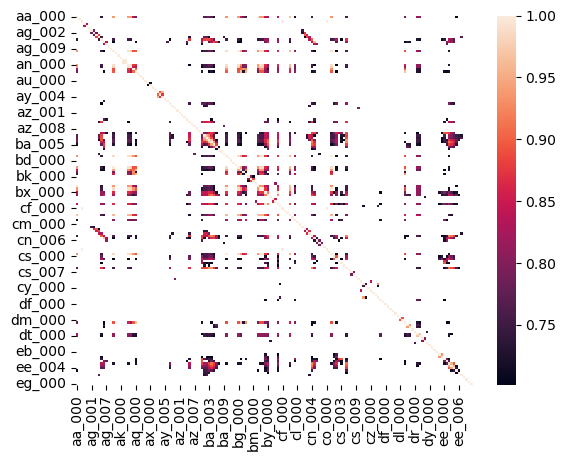

In [68]:
sns.heatmap(strong_correlations_df1)

### Standartization and Normalization of data

In [69]:
X_train = df1_without_strong_corr
X_test = df2_without_strong_corr

In [70]:
X_train

,ac_000,ag_000,ag_008,ag_009,ai_000,aj_000,ak_000,ar_000,as_000,at_000,...,dk_000,dq_000,dy_000,dz_000,ea_000,eb_000,ee_008,ee_009,ef_000,eg_000
0,2.130706e+09,0.0,25896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2801180.0,73224.0,0.0,0.0,0.0
1,0.000000e+00,0.0,31642.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3477820.0,97576.0,1500.0,0.0,0.0
2,2.280000e+02,0.0,12016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1040120.0,95128.0,514.0,0.0,0.0
3,7.000000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2014.0,44.0,0.0,0.0,0.0,0.0,0.0,4.0,32.0
4,1.368000e+03,0.0,4588.0,0.0,0.0,226.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27588.0,0.0,0.0,21173050.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,6.640000e+02,0.0,164972.0,12560.0,0.0,280.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,80125300.0,898642.0,28588.0,0.0,0.0
55932,2.130707e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,0.0,0.0,1285980.0,0.0,0.0,0.0,0.0
55933,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55934,2.130706e+09,0.0,360436.0,59754.0,0.0,0.0,0.0,0.0,0.0,57300.0,...,0.0,0.0,0.0,0.0,0.0,39881280.0,802280.0,388422.0,0.0,0.0


In [71]:
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
# transform testing data
X_test_norm = norm.transform(X_test)

In [72]:
X_train_norm = pd.DataFrame(X_train_norm, columns=list(X_train.columns[:]))
X_test_norm = pd.DataFrame(X_test_norm, columns=list(X_test.columns[:]))

In [73]:
X_train_norm.head()

,ac_000,ag_000,ag_008,ag_009,ai_000,aj_000,ak_000,ar_000,as_000,at_000,...,dk_000,dq_000,dy_000,dz_000,ea_000,eb_000,ee_008,ee_009,ef_000,eg_000
0,9.999998e-01,0.0,0.001463,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,0.002118,0.005432,0.000000,0.000000,0.000000
1,0.000000e+00,0.0,0.001787,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,0.002630,0.007238,0.000394,0.000000,0.000000
2,1.070067e-07,0.0,0.000679,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,0.000787,0.007056,0.000135,0.000000,0.000000
3,3.285295e-08,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,3.170718e-07,0.000012,0.0,0.0,0.000000,0.000000,0.000000,0.008299,0.027923
4,6.420405e-07,0.0,0.000259,0.0,0.0,0.000040,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.007273,0.0,0.0,0.016010,0.032189,0.000320,0.000000,0.000000


In [74]:
X_train_norm.describe()

,ac_000,ag_000,ag_008,ag_009,ai_000,aj_000,ak_000,ar_000,as_000,at_000,...,dk_000,dq_000,dy_000,dz_000,ea_000,eb_000,ee_008,ee_009,ef_000,eg_000
count,5.593600e+04,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,...,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000,55936.000000
mean,1.694562e-01,0.000064,0.001681,0.000209,0.000358,0.000157,0.000089,0.001424,0.000033,0.000484,...,0.000324,0.000720,0.002055,0.000154,0.000183,0.007391,0.009337,0.002079,0.000174,0.000174
std,3.733186e-01,0.006233,0.010374,0.006669,0.007874,0.008516,0.007162,0.015840,0.005068,0.011826,...,0.011649,0.015509,0.015676,0.007741,0.006318,0.032189,0.026362,0.010554,0.008563,0.007064
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.447901e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.696976e-08,0.000000,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000222,0.000000,0.000000,0.000000
75%,5.087514e-07,0.000000,0.001448,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000009,0.000000,0.000000,0.003673,0.010089,0.000557,0.000000,0.000000
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = list(X_train.columns[:])

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [76]:
X_train_stand.head()

,ac_000,ag_000,ag_008,ag_009,ai_000,aj_000,ak_000,ar_000,as_000,at_000,...,dk_000,dq_000,dy_000,dz_000,ea_000,eb_000,ee_008,ee_009,ef_000,eg_000
0,2.224778,-0.010259,-0.020988,-0.031394,-0.045453,-0.018455,-0.012458,-0.08992,-0.006421,-0.040923,...,-0.027829,-0.046456,-0.131098,-0.019952,-0.028938,-0.163819,-0.148129,-0.196997,-0.020341,-0.024611
1,-0.453922,-0.010259,0.010300,-0.031394,-0.045453,-0.017036,-0.012458,-0.08992,-0.006421,-0.040923,...,-0.027829,-0.046456,-0.131098,-0.019952,-0.028938,-0.147924,-0.079608,-0.159694,-0.020341,-0.024611
2,-0.453922,-0.010259,-0.096568,-0.031394,-0.045453,-0.018455,-0.012458,-0.08992,-0.006421,-0.040923,...,-0.027829,-0.046456,-0.131098,-0.019952,-0.028938,-0.205189,-0.086496,-0.184214,-0.020341,-0.024611
3,-0.453922,-0.010259,-0.161998,-0.031394,-0.045453,-0.018455,-0.012458,-0.08992,-0.006421,-0.040923,...,-0.027829,-0.046436,-0.130358,-0.019952,-0.028938,-0.229623,-0.354164,-0.196997,0.948837,3.928427
4,-0.453921,-0.010259,-0.137015,-0.031394,-0.045453,-0.013740,-0.012458,-0.08992,-0.006421,-0.040923,...,-0.027829,-0.046456,0.332888,-0.019952,-0.028938,0.267762,0.866883,-0.166707,-0.020341,-0.024611


In [77]:
X_train_stand.describe()

,ac_000,ag_000,ag_008,ag_009,ai_000,aj_000,ak_000,ar_000,as_000,at_000,...,dk_000,dq_000,dy_000,dz_000,ea_000,eb_000,ee_008,ee_009,ef_000,eg_000
count,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,...,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04,5.593600e+04
mean,-1.958282e-16,-4.053331e-15,3.373462e-16,1.269012e-15,5.993612e-16,9.399656e-16,-4.605354e-15,5.743773e-15,1.235468e-15,2.549838e-15,...,-2.605195e-15,-4.788946e-16,3.429413e-16,-9.936234e-16,-1.808723e-15,2.217429e-16,-4.393396e-16,-1.639669e-15,4.900255e-16,1.774283e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-4.539224e-01,-1.025945e-02,-1.619982e-01,-3.139353e-02,-4.545303e-02,-1.845473e-02,-1.245768e-02,-8.992031e-02,-6.420627e-03,-4.092252e-02,...,-2.782868e-02,-4.645596e-02,-1.310982e-01,-1.995225e-02,-2.893801e-02,-2.296230e-01,-3.541644e-01,-1.969966e-01,-2.034137e-02,-2.461108e-02
25%,-4.539224e-01,-1.025945e-02,-1.619982e-01,-3.139353e-02,-4.545303e-02,-1.845473e-02,-1.245768e-02,-8.992031e-02,-6.420627e-03,-4.092252e-02,...,-2.782868e-02,-4.645596e-02,-1.310982e-01,-1.995225e-02,-2.893801e-02,-2.296230e-01,-3.541644e-01,-1.969966e-01,-2.034137e-02,-2.461108e-02
50%,-4.539222e-01,-1.025945e-02,-1.537813e-01,-3.139353e-02,-4.545303e-02,-1.845473e-02,-1.245768e-02,-8.992031e-02,-6.420627e-03,-4.092252e-02,...,-2.782868e-02,-4.645596e-02,-1.310982e-01,-1.995225e-02,-2.893801e-02,-2.126553e-01,-3.457512e-01,-1.969966e-01,-2.034137e-02,-2.461108e-02
75%,-4.539211e-01,-1.025945e-02,-2.244767e-02,-2.841702e-02,-4.545303e-02,-1.845473e-02,-1.245768e-02,-8.992031e-02,-6.420627e-03,-4.092252e-02,...,-2.782868e-02,-4.645596e-02,-1.305263e-01,-1.995225e-02,-2.893801e-02,-1.155306e-01,2.854103e-02,-1.442264e-01,-2.034137e-02,-2.461108e-02
max,2.224779e+00,1.604266e+02,9.623239e+01,1.499087e+02,1.269621e+02,1.174102e+02,1.396151e+02,6.304392e+01,1.973167e+02,8.452164e+01,...,8.581572e+01,6.443358e+01,6.366153e+01,1.291625e+02,1.582584e+02,3.083675e+01,3.757901e+01,9.455260e+01,1.167656e+02,1.415436e+02


# Modeling (Main Analysis)

In [78]:
# Hyper parameter tuning:
# - model: model for which we want to tune parameters
# - params: dictionary for parameters which we want to tune
# - x: train features set
# - y: train target set
# return the list of best parameters
from sklearn.model_selection import RepeatedStratifiedKFold
def hyper_param_tuning(model, params, x,y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    clf = GridSearchCV(model, param_grid = params, cv = cv, verbose=True, n_jobs=-1)
    clf.fit(x, y)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return clf.best_params_

# Score of the model:
# - model: model for which we want to estimate
# - x_test: test features set
# - y_test: test target set
# return the default score of the model and classification report
def score_of_model(model, x_test, y_test):
    score = model.score(x_test, y_test)
    print(f"Score: {score}")
    print("Classification report: ")
    y_pred = model.predict(x_test)
    clas_rep = classification_report(y_test,y_pred)
    print(clas_rep)
    return score, clas_rep

In [79]:
# lets create array for comparing results of models
result = np.array([])

### Logistic Regression

For Standardized data

In [80]:
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty' : ['l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01]}
best_params = hyper_param_tuning(LogisticRegression(),params=param_grid, x = X_train_stand[0:1000], y = y_train[0:1000])
log_reg = LogisticRegression(C = best_params['C'], penalty = best_params['penalty'], solver=best_params['solver'])
log_reg.fit(X_train_stand, y_train)
log_reg_stand_score, _ = score_of_model(log_reg, x_test=X_test_stand, y_test=y_test)
result = np.append(result, ['Logistic Regression + Standardized data', log_reg_stand_score])

Fitting 30 folds for each of 15 candidates, totalling 450 fits
Best: 0.990333 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.977333 (0.011235) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.977333 (0.011813) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.975333 (0.011470) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.981667 (0.010980) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.981667 (0.010980) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.980333 (0.011686) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.986333 (0.010796) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.986333 (0.010796) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.984667 (0.012841) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.990333 (0.007063) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990333 (0.007063) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989333 (0.009978) with: {'C': 0.1, 

For normalized data

In [81]:
best_params = hyper_param_tuning(LogisticRegression(),params=param_grid, x = X_train_norm[0:1000], y = y_train[0:1000])
log_reg = LogisticRegression(C = best_params['C'], penalty = best_params['penalty'], solver=best_params['solver'])
log_reg.fit(X_train_norm, y_train)
log_reg_norm_score, _ = score_of_model(log_reg, x_test=X_test_norm, y_test=y_test)
result = np.append(result, ['Logistic Regression + Normalized data', log_reg_norm_score])

Fitting 30 folds for each of 15 candidates, totalling 450 fits
Best: 0.985000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.985000 (0.007638) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.985000 (0.007638) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.985000 (0.007638) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.983333 (0.005375) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983333 (0.005375) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983333 (0.005375) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.983000 (0.004583) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983000 (0.004583) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983000 (0.004583) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.983000 (0.004583) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983000 (0.004583) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983000 (0.004583) with: {'C': 0.1, 

### Ridge Classifier

For standardized data

In [82]:
param_grid = {'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
best_params = hyper_param_tuning(RidgeClassifier(),params=param_grid, x = X_train_stand[0:1000], y = y_train[0:1000])
rig_reg = RidgeClassifier(alpha=best_params['alpha'])
rig_reg.fit(X_train_stand, y_train)
rig_reg_stand_score, _ = score_of_model(rig_reg, x_test=X_test_stand, y_test=y_test)
result = np.append(result, ['Ridge Classifier + Standardized data', rig_reg_stand_score])

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best: 0.988000 using {'alpha': 0.6}
0.987333 (0.008138) with: {'alpha': 0.1}
0.987000 (0.007810) with: {'alpha': 0.2}
0.987000 (0.007810) with: {'alpha': 0.3}
0.987000 (0.007810) with: {'alpha': 0.4}
0.987000 (0.007810) with: {'alpha': 0.5}
0.988000 (0.007916) with: {'alpha': 0.6}
0.988000 (0.007916) with: {'alpha': 0.7}
0.988000 (0.007916) with: {'alpha': 0.8}
0.988000 (0.007916) with: {'alpha': 0.9}
0.988000 (0.007916) with: {'alpha': 1.0}
Score: 0.9801875
Classification report: 
              precision    recall  f1-score   support

         neg       0.98      1.00      0.99     15625
         pos       0.80      0.21      0.33       375

    accuracy                           0.98     16000
   macro avg       0.89      0.60      0.66     16000
weighted avg       0.98      0.98      0.97     16000



For normalized data

In [83]:
best_params = hyper_param_tuning(RidgeClassifier(),params=param_grid, x = X_train_norm[0:1000], y = y_train[0:1000])
rig_reg = RidgeClassifier(alpha=best_params['alpha'])
rig_reg.fit(X_train_norm, y_train)
rig_reg_norm_score, _ = score_of_model(rig_reg, x_test=X_test_norm, y_test=y_test)
result = np.append(result, ['Ridge Classifier + Normalized data', rig_reg_norm_score])

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best: 0.984000 using {'alpha': 0.1}
0.984000 (0.007572) with: {'alpha': 0.1}
0.983333 (0.006498) with: {'alpha': 0.2}
0.983333 (0.005375) with: {'alpha': 0.3}
0.983000 (0.005260) with: {'alpha': 0.4}
0.982667 (0.005735) with: {'alpha': 0.5}
0.982667 (0.005735) with: {'alpha': 0.6}
0.982667 (0.005735) with: {'alpha': 0.7}
0.983000 (0.005260) with: {'alpha': 0.8}
0.983667 (0.004819) with: {'alpha': 0.9}
0.983667 (0.004819) with: {'alpha': 1.0}
Score: 0.9801875
Classification report: 
              precision    recall  f1-score   support

         neg       0.98      1.00      0.99     15625
         pos       0.80      0.21      0.33       375

    accuracy                           0.98     16000
   macro avg       0.89      0.60      0.66     16000
weighted avg       0.98      0.98      0.97     16000



### KNN

For standartized data

In [84]:
n_neighbors = range(3, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

best_params = hyper_param_tuning(KNeighborsClassifier(),params=grid, x = X_train_stand[0:1000], y = y_train[0:1000])
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'], weights=best_params['weights'])
knn.fit(X_train_stand, y_train)
knn_stand_score, _ =  score_of_model(knn, x_test=X_test_stand, y_test=y_test)
result = np.append(result, ['KNN + Standardized data', knn_stand_score])

Fitting 30 folds for each of 54 candidates, totalling 1620 fits
Best: 0.985333 using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.983333 (0.006498) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.985333 (0.007630) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.982333 (0.005588) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.984333 (0.007157) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.982000 (0.005416) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.984000 (0.007118) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.983000 (0.004583) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.985000 (0.006191) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.983000 (0.004583) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.985000 (0.006191) with: {'metric'

For normalized data

In [85]:
best_params = hyper_param_tuning(KNeighborsClassifier(),params=grid, x = X_train_norm[0:1000], y = y_train[0:1000])
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'], weights=best_params['weights'])
knn.fit(X_train_norm, y_train)
knn_norm_score, _ =  score_of_model(knn, x_test=X_test_norm, y_test=y_test)
result = np.append(result, ['KNN + Normalized data', knn_norm_score])

Fitting 30 folds for each of 54 candidates, totalling 1620 fits
Best: 0.985000 using {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.984667 (0.007630) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.984667 (0.007630) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.981667 (0.005217) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.983667 (0.007063) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.982333 (0.005588) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.984333 (0.007157) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.982000 (0.005416) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.984000 (0.007118) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.983000 (0.004583) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.985000 (0.006191) with: {'metric

best_params = hyper_param_tuning(KNeighborsClassifier(),params=grid, x = X_train_norm, y = y_train)
rig_reg = RidgeClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'], weights=best_params['weights'])
rig_reg.fit(X_train_norm, y_train)
score_of_model(rig_reg, x_test=X_test_norm, y_test=y_test)

### Support Vector Machines

For standardized data

In [86]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [10, 1.0, 0.1, 0.01]
grid = dict(kernel=kernel,C=C)
best_params = hyper_param_tuning(SVC(),params=grid, x = X_train_stand[0:1000], y = y_train[0:1000])
svc = SVC(C = best_params['C'], kernel= best_params['kernel'])
svc.fit(X_train_stand, y_train)
svm_stand_score, _ =  score_of_model(svc, x_test=X_test_stand, y_test=y_test)
result = np.append(result, ['SVM + Standardized data', svm_stand_score])

Fitting 30 folds for each of 12 candidates, totalling 360 fits
Best: 0.987333 using {'C': 10, 'kernel': 'poly'}
0.987333 (0.008919) with: {'C': 10, 'kernel': 'poly'}
0.987000 (0.006904) with: {'C': 10, 'kernel': 'rbf'}
0.984333 (0.009551) with: {'C': 10, 'kernel': 'sigmoid'}
0.986000 (0.007118) with: {'C': 1.0, 'kernel': 'poly'}
0.983000 (0.004583) with: {'C': 1.0, 'kernel': 'rbf'}
0.986333 (0.008750) with: {'C': 1.0, 'kernel': 'sigmoid'}
0.984000 (0.005538) with: {'C': 0.1, 'kernel': 'poly'}
0.983000 (0.004583) with: {'C': 0.1, 'kernel': 'rbf'}
0.983000 (0.004583) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.983000 (0.005260) with: {'C': 0.01, 'kernel': 'poly'}
0.983000 (0.004583) with: {'C': 0.01, 'kernel': 'rbf'}
0.983000 (0.004583) with: {'C': 0.01, 'kernel': 'sigmoid'}
Score: 0.9839375
Classification report: 
              precision    recall  f1-score   support

         neg       0.99      1.00      0.99     15625
         pos       0.75      0.47      0.58       375

    accuracy   

For normalized data

In [87]:
best_params = hyper_param_tuning(SVC(),params=grid, x = X_train_norm[0:1000], y = y_train[0:1000])
svc = SVC(C = best_params['C'], kernel= best_params['kernel'])
svc.fit(X_train_norm, y_train)
svm_norm_score, _ = score_of_model(svc, x_test=X_test_norm, y_test=y_test)
result = np.append(result, ['SVM + Normalized data', svm_norm_score])

Fitting 30 folds for each of 12 candidates, totalling 360 fits
Best: 0.986333 using {'C': 10, 'kernel': 'rbf'}
0.984000 (0.006110) with: {'C': 10, 'kernel': 'poly'}
0.986333 (0.009123) with: {'C': 10, 'kernel': 'rbf'}
0.983333 (0.009068) with: {'C': 10, 'kernel': 'sigmoid'}
0.982667 (0.005735) with: {'C': 1.0, 'kernel': 'poly'}
0.983000 (0.004583) with: {'C': 1.0, 'kernel': 'rbf'}
0.982333 (0.005588) with: {'C': 1.0, 'kernel': 'sigmoid'}
0.983000 (0.004583) with: {'C': 0.1, 'kernel': 'poly'}
0.983000 (0.004583) with: {'C': 0.1, 'kernel': 'rbf'}
0.983000 (0.004583) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.983000 (0.004583) with: {'C': 0.01, 'kernel': 'poly'}
0.983000 (0.004583) with: {'C': 0.01, 'kernel': 'rbf'}
0.983000 (0.004583) with: {'C': 0.01, 'kernel': 'sigmoid'}
Score: 0.9828125
Classification report: 
              precision    recall  f1-score   support

         neg       0.98      1.00      0.99     15625
         pos       0.80      0.36      0.49       375

    accuracy    

### Random Forest

For standardized data

In [88]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators, max_features=max_features)
best_params = hyper_param_tuning(RandomForestClassifier(),params=grid, x = X_train_stand[0:1000], y = y_train[0:1000])
rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'])
rf.fit(X_train_stand, y_train)
rf_stand_score, _ = score_of_model(rf, x_test=X_test_stand, y_test=y_test)
result = np.append(result, ['RF + Standardized data', rf_stand_score])

Fitting 30 folds for each of 6 candidates, totalling 180 fits
Best: 0.987667 using {'max_features': 'sqrt', 'n_estimators': 100}
0.985333 (0.008055) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.987667 (0.007608) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.987333 (0.007717) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.985000 (0.007188) with: {'max_features': 'log2', 'n_estimators': 10}
0.987333 (0.007717) with: {'max_features': 'log2', 'n_estimators': 100}
0.987333 (0.007717) with: {'max_features': 'log2', 'n_estimators': 1000}
Score: 0.9861875
Classification report: 
              precision    recall  f1-score   support

         neg       0.99      1.00      0.99     15625
         pos       0.93      0.45      0.60       375

    accuracy                           0.99     16000
   macro avg       0.96      0.72      0.80     16000
weighted avg       0.99      0.99      0.98     16000



For normalized data

In [89]:
best_params = hyper_param_tuning(RandomForestClassifier(),params=grid, x = X_train_norm[0:1000], y = y_train[0:1000])
rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'])
rf.fit(X_train_norm, y_train)
rf_norm_score, _ = score_of_model(rf, x_test=X_test_norm, y_test=y_test)
result = np.append(result, ['RF + Normalized data', rf_norm_score])

Fitting 30 folds for each of 6 candidates, totalling 180 fits
Best: 0.987667 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.986333 (0.007063) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.987333 (0.007272) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.987667 (0.007157) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.984667 (0.007180) with: {'max_features': 'log2', 'n_estimators': 10}
0.987667 (0.007157) with: {'max_features': 'log2', 'n_estimators': 100}
0.987333 (0.007717) with: {'max_features': 'log2', 'n_estimators': 1000}
Score: 0.985625
Classification report: 
              precision    recall  f1-score   support

         neg       0.99      1.00      0.99     15625
         pos       0.92      0.42      0.58       375

    accuracy                           0.99     16000
   macro avg       0.95      0.71      0.79     16000
weighted avg       0.98      0.99      0.98     16000



In [90]:
columns = result[::2]
numbers = result[1::2]
numbers = numbers[:, np.newaxis]


In [91]:
res_df = pd.DataFrame({'Model + Data': columns, 'Result': numbers.flatten()})

In [92]:
res_df

,Model + Data,Result
0,Logistic Regression + Standardized data,0.9806875
1,Logistic Regression + Normalized data,0.9809375
2,Ridge Classifier + Standardized data,0.9801875
3,Ridge Classifier + Normalized data,0.9801875
4,KNN + Standardized data,0.9825625
5,KNN + Normalized data,0.9825625
6,SVM + Standardized data,0.9839375
7,SVM + Normalized data,0.9828125
8,RF + Standardized data,0.9861875
9,RF + Normalized data,0.985625
